# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала.

<!--
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [570]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import librosa
from IPython.display import Audio
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

В .wav файле могут храниться аудиофайлы в несжатом виде, а также метаданные (тип формата звуковых данных, количество аудио каналов,
частота дискретизации, средняя скорость потока данных, выравнивание блока в байтах).Узнать параметры дискретизации и квантования можно через аудио редакторы, например - Audacity, также с помощью библиотеки librosa, как одного из вариантов.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [571]:
# YOUR ANSWER HERE
file_path = 'task1.wav'
y, freq = librosa.load(file_path, sr=None)

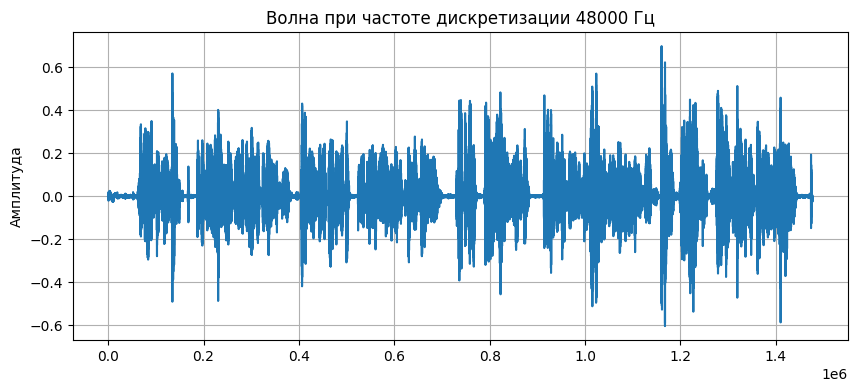

In [572]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title(f'Волна при частоте дискретизации {freq} Гц')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [573]:
Audio(y, rate=freq)

Изменение частоты дискретизации

In [574]:
new_freq = 5000
y2 = librosa.resample(y, orig_sr=freq, target_sr=new_freq)

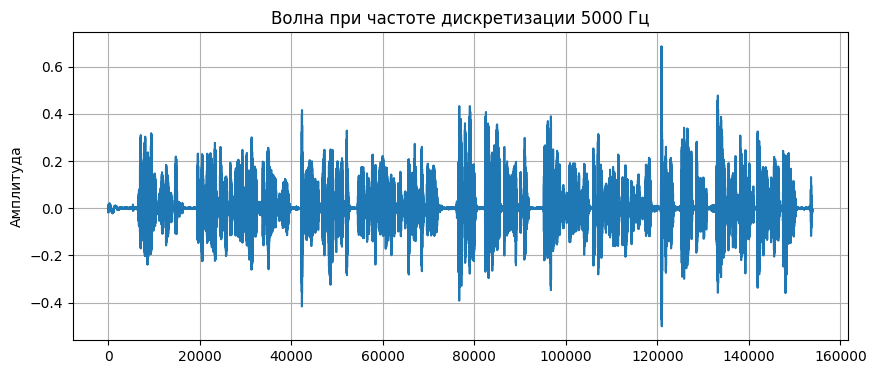

In [575]:
plt.figure(figsize=(10, 4))
plt.plot(y2)
plt.title(f'Волна при частоте дискретизации {new_freq} Гц')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [576]:
Audio(y2, rate=new_freq)

При частоте ниже 8000 Гц приходилось слушать внимательно, так как разобрать уже было не так просто, как при 16 кГц и выше. При снижении частоты дискретизации ниже 3кГц понимание речи становится совсем затруднительным. Полагаю, что роль еще играет мое знакомство с текстом - если бы текст я не знала, понять, что воспроизводится было бы еще сложнее.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Главным отличием .wav от .mp3 и .ogg является очень большой размер файлов из-за отсутствия сжатия. WAV является форматом аудиофайлов без потерь,представляющим собой ближайшую цифровую версию аналогового сигнала. MP3 же, в свою очередь, является форматом с потерями, с применением цифрового сжатия к форме сигнала. Тем самым размер MP3 получается меньше, чем у WAV. Файлы OGG также используют алгоритм сжатия с потерями, обеспечивая себе меньший размер.

WAV рекомендуется использовать для хранения необработанных записей с максимально возможным качеством. MP3 и OGG более универсальны для обмена в Интернете, загрузки в сервисы и т.д.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону.

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время.


In [578]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    # plt.grid(which='major',
    #     color = 'k',
    #     linewidth = 1)
    # plt.grid(which='minor',
    #     color = 'k',
    #     linestyle = ':')
    plt.show()

In [579]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

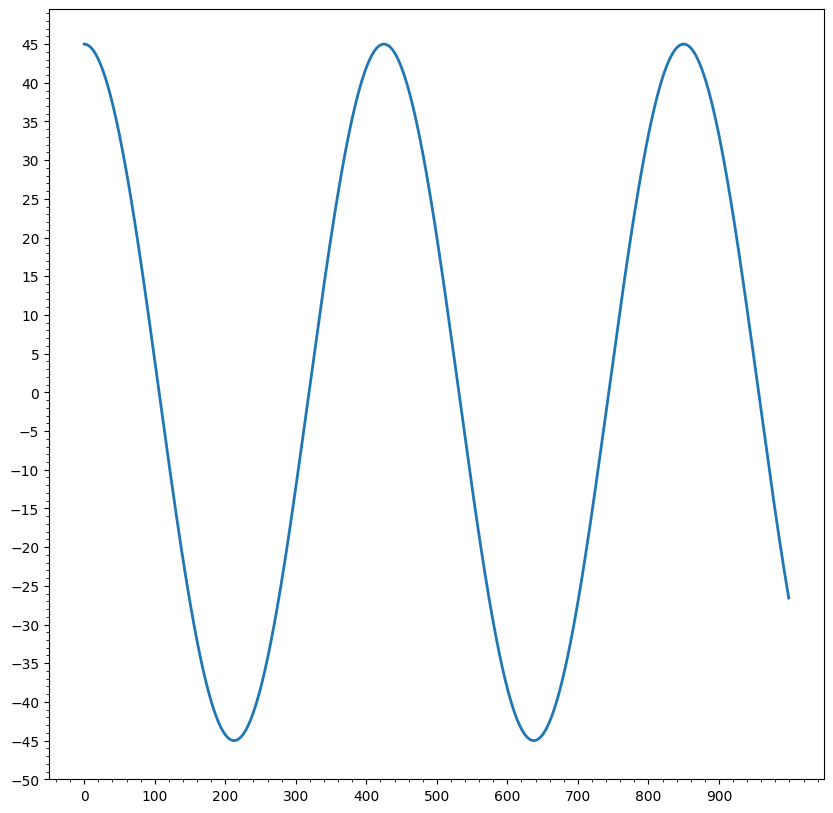

In [580]:
draw_signal(test_data['task2']['a'])

In [581]:
def generate(A, omega, phi, l):
    t = np.arange(l)
    return A * np.cos(omega * t + phi)

In [582]:
# YOUR CODE HERE
A = 45
omega = 2 * np.pi / 425
phi = 0

l = 1000
a = generate(A, omega, phi, l)

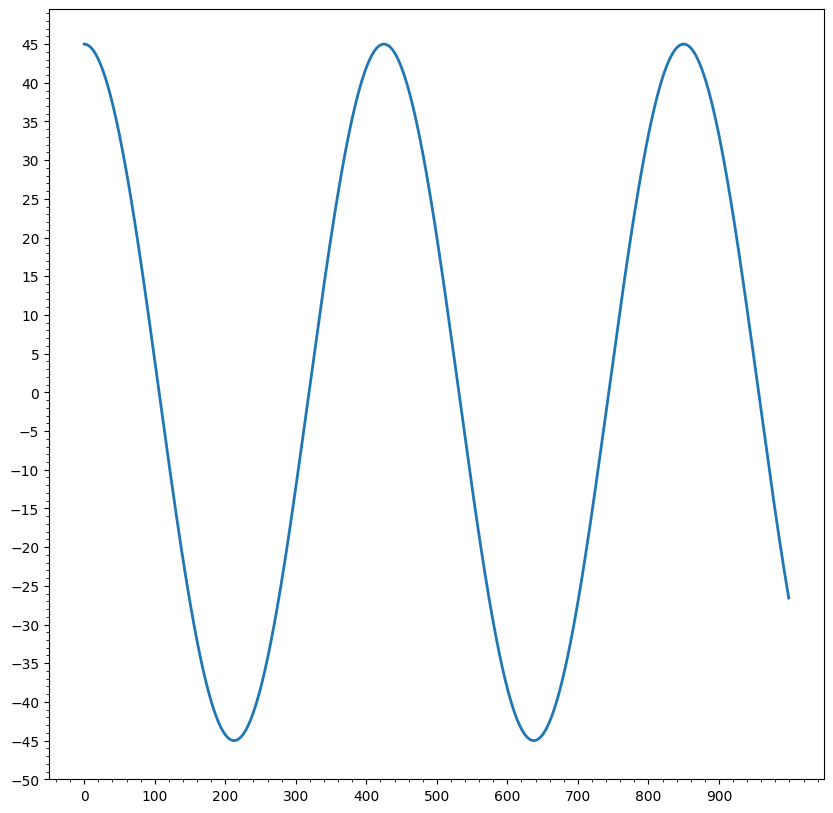

In [583]:
draw_signal(a)

In [584]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45 $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0148$

3. Фаза - $\phi= 0$

### Сигнал ***b***

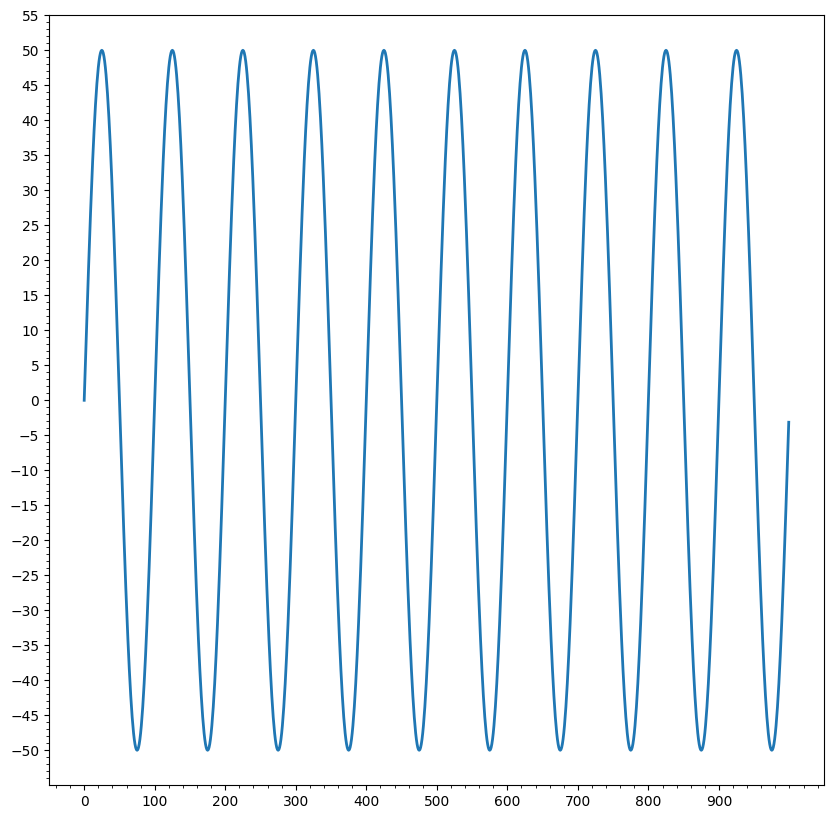

In [585]:
draw_signal(test_data['task2']['b'])

In [586]:
# YOUR CODE HERE
A = 50
omega = 2 * np.pi / 100
phi = 300.01

l = 1000
b = generate(A, omega, phi, l)

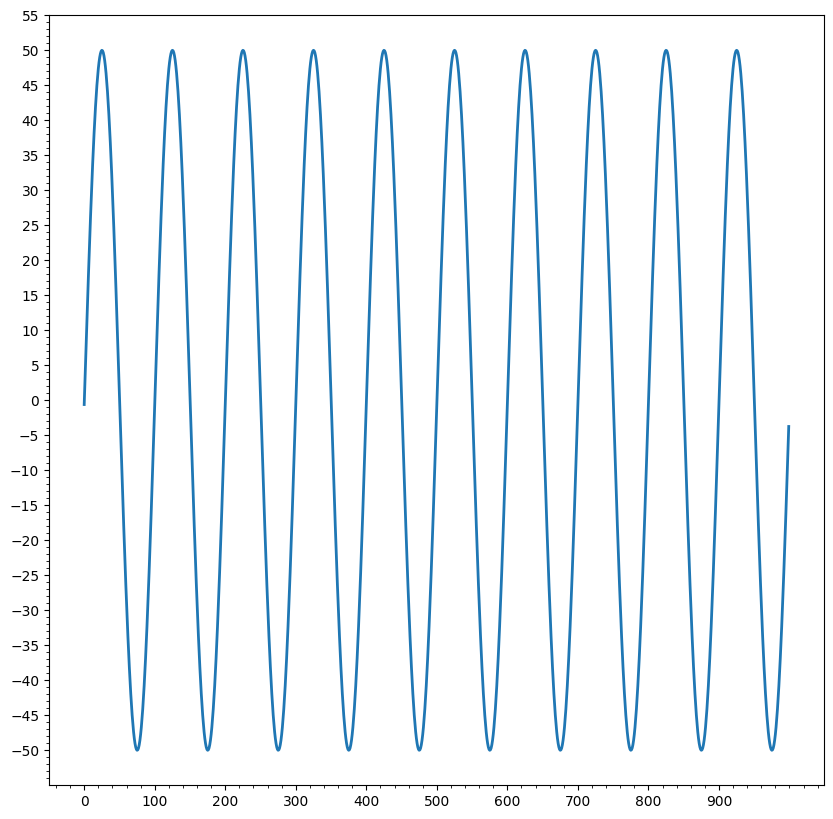

In [587]:
draw_signal(b)

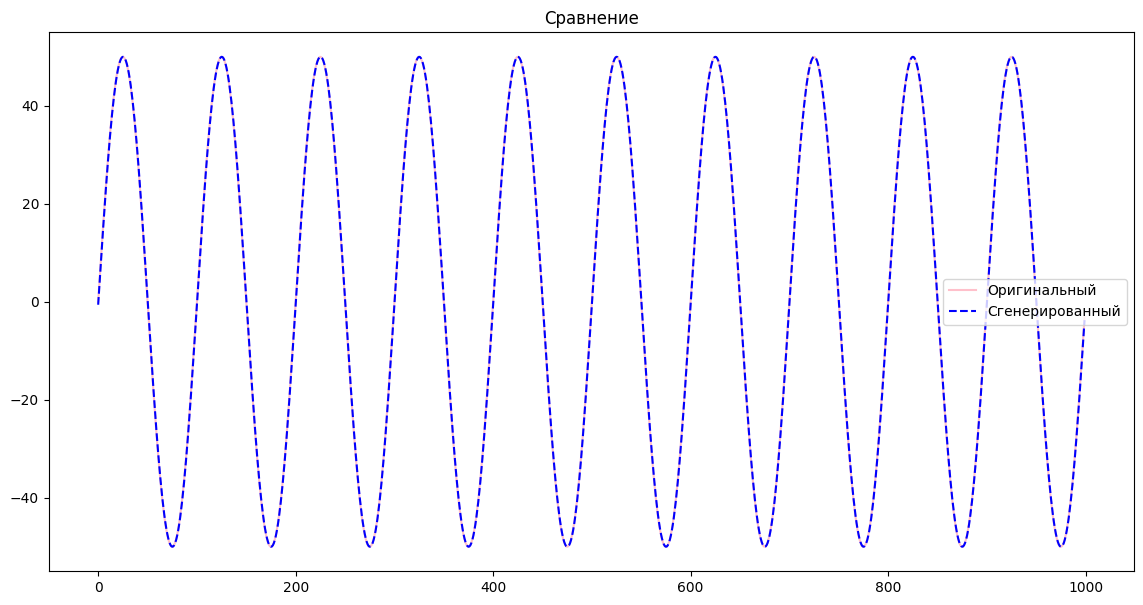

In [588]:
plt.figure(figsize=(14, 7))
plt.plot(test_data["task2"]["b"], label='Оригинальный', color='pink')
plt.plot(b, label='Сгенерированный', color='blue', linestyle='--')
plt.legend()
plt.title('Сравнение')
plt.show()

In [589]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0628$

3. Фаза - $\phi= 300.01$

### Сигнал ***c***

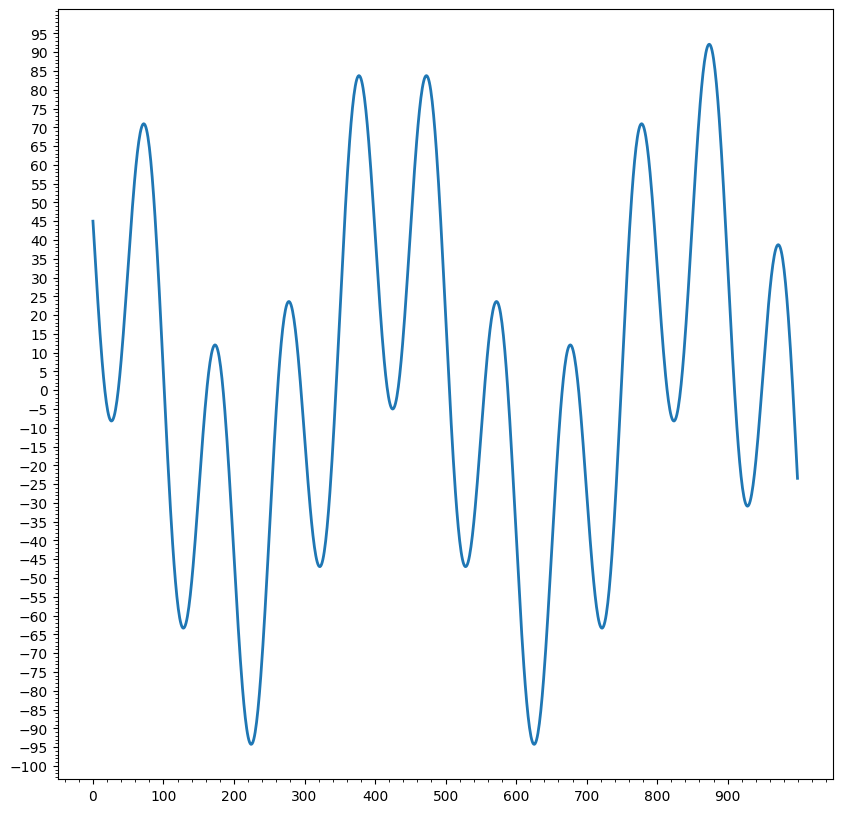

In [590]:
draw_signal(test_data['task2']['c'])

In [591]:
A = 45
omega = 2 * np.pi / 425
phi = 0
A1 = 50
omega1 = 2 * np.pi / 100
phi1 = 309.45
l = 1000
c = generate(A, omega, phi, l) + generate(A1, omega1, phi1, l)

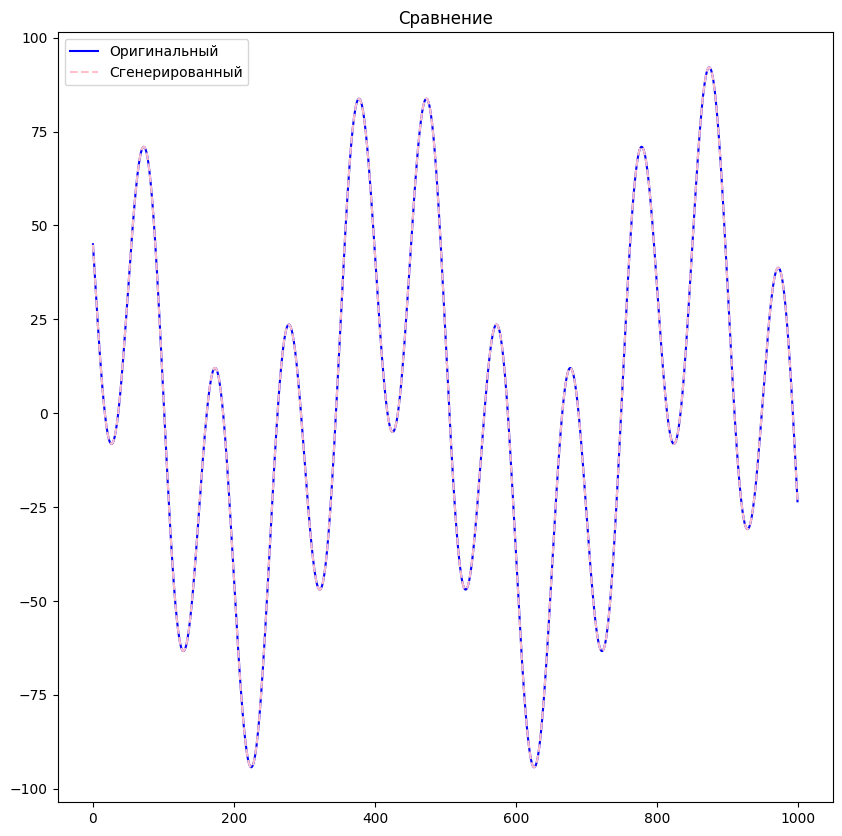

In [592]:
plt.figure(figsize=(10, 10))
plt.plot(test_data["task2"]["c"], label='Оригинальный', color='blue')
plt.plot(c, label='Сгенерированный', color='pink', linestyle='--')
plt.legend()
plt.title('Сравнение')
plt.show()

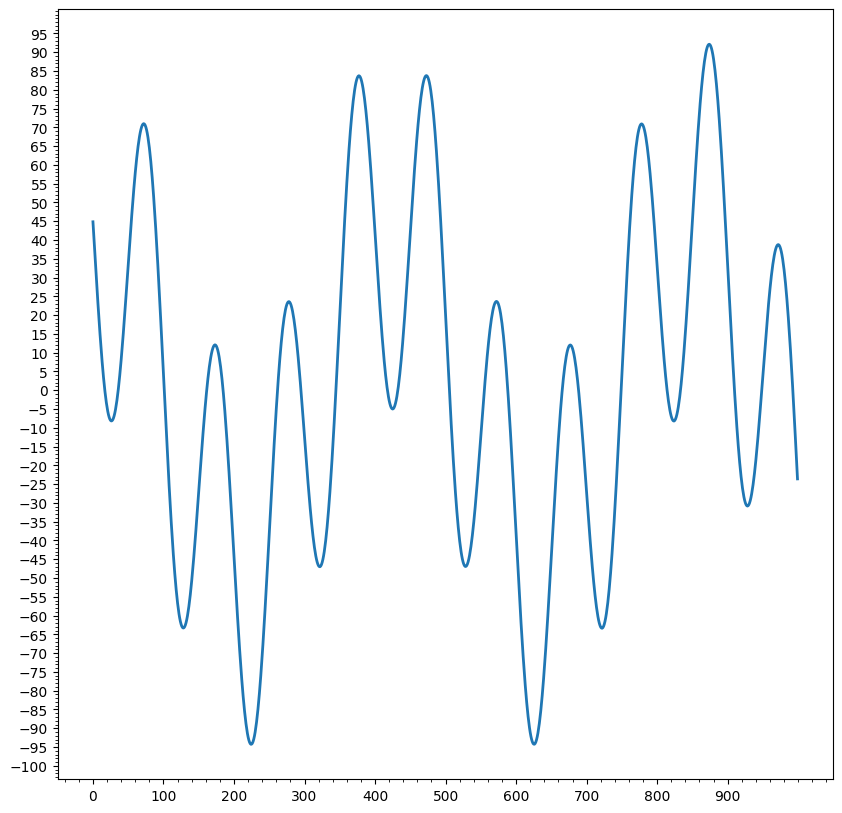

In [593]:
draw_signal(c)

In [594]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [595]:
def convolve(x1, x2):
    len_x1 = len(x1)
    len_x2 = len(x2)
    len_out = len_x1 + len_x2 - 1
    result = np.zeros(len_out)

    for i in range(len_out):
        for j in range(len_x2):
            if 0 <= (i - j) < len_x1:
                result[i] += x1[i - j] * x2[j]
    return result

In [596]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [597]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [598]:
test_convolve(a, b, print_debug=False)

Ok!


In [599]:
# Построение графиков
my_result = convolve(a, b)
scipy_result = scipy.signal.convolve(a, b, method='direct')

### Нарисуйте результат свертки a и b

Сигнал **а**

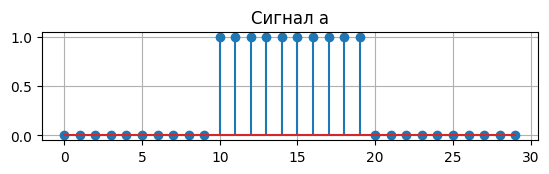

In [605]:
# YOUR CODE HERE
plt.subplot(3, 1, 1)
plt.title('Сигнал a')
plt.stem(a)
plt.grid()

Сигнал **b**

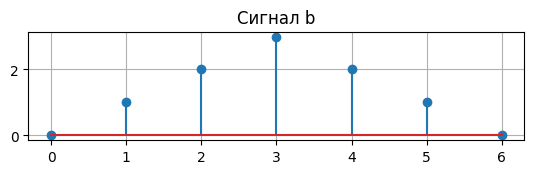

In [606]:
# YOUR CODE HERE
plt.subplot(3, 1, 2)
plt.title('Сигнал b')
plt.stem(b)
plt.grid()

Свертка **a** и **b**

In [607]:
# YOUR CODE HERE
plt.subplot(3, 1, 3)
plt.title('My result')
plt.plot(my_result, color='pink')
plt.grid()
plt.tight_layout()
plt.show()

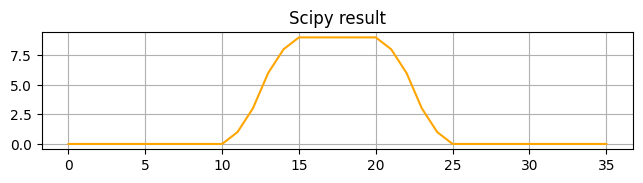

In [608]:
plt.subplot(3, 1, 3)
plt.title('Scipy result')
plt.plot(scipy_result, color='orange')
plt.grid()
plt.tight_layout()
plt.show()

Все 3 графика на одной картинке:

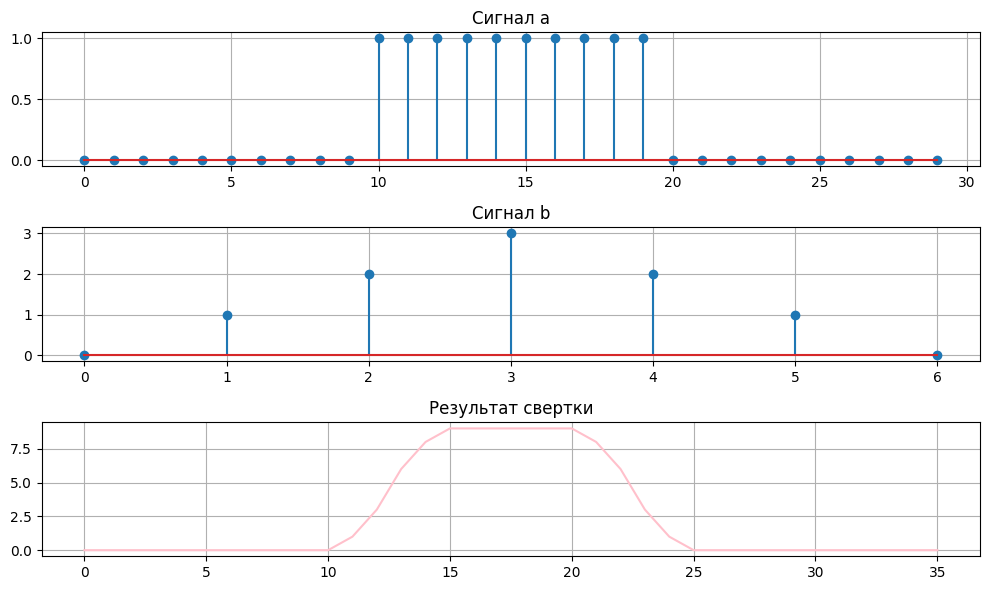

In [611]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.title('Сигнал a')
plt.stem(a)
plt.grid()

plt.subplot(3, 1, 2)
plt.title('Сигнал b')
plt.stem(b)
plt.grid()

plt.subplot(3, 1, 3)
plt.title('Результат свертки')
plt.plot(my_result, color='pink')
plt.grid()

plt.tight_layout()
plt.show()